# About Dataset

Domain : Real Estate 

Challenges :

1.Missing value treatment 
2.Outlier treatment 
3.Understainding which variables drve the price of homes in Boston

The Boston Housing Dataset

The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA.

The following describes the dataset columns:

* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per \$10,000
* PTRATIO - pupil-teacher ratio by town
* B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT - % lower status of the population
* MEDV - Median value of owner-occupied homes in \$1000's


In [44]:
#Standard imports
import os
#Third party imports
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')



In [45]:
df = pd.read_csv(r'datasets/HousingData.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [46]:
np.shape(df)

(506, 14)

Let us summarize the data to see the distribution of the data

In [47]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


From get-go, two data coulmns show interesting summeries. They are : ZN (proportion of residential land zoned for lots over 25,000 sq.ft.) with 0 for 25th, 50th percentiles. Second, CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise) with 0 for 25th, 50th and 75th percentiles. These summeries are understandable as both variables are conditional + categorical variables. First assumption would be that these coulms may not be useful in regression task such as predicting MEDV (Median value of owner-occupied homes).

Another interesing fact on the dataset is the max value of MEDV. From the original data description, it says: Variable #14 seems to be censored at 50.00 (corresponding to a median price of $50,000). Based on that, values above 50.00 may not help to predict MEDV. Let's plot the dataset and see interesting trends/stats.

### Checking which columns have NaN

In [48]:
print(df.isna().sum())

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64


In [49]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


# Separate features and target
X = df.drop("MEDV", axis=1)
y = df["MEDV"]

# Imputer replaces NaN with column mean
imputer = SimpleImputer(strategy="mean")
X_imputed = imputer.fit_transform(X)  # returns numpy array

# Split dataset
X_train, X_test, y_train, y_test = train_test_split( X_imputed, y, test_size=0.2, random_state=42)




# Correlation HeatMap

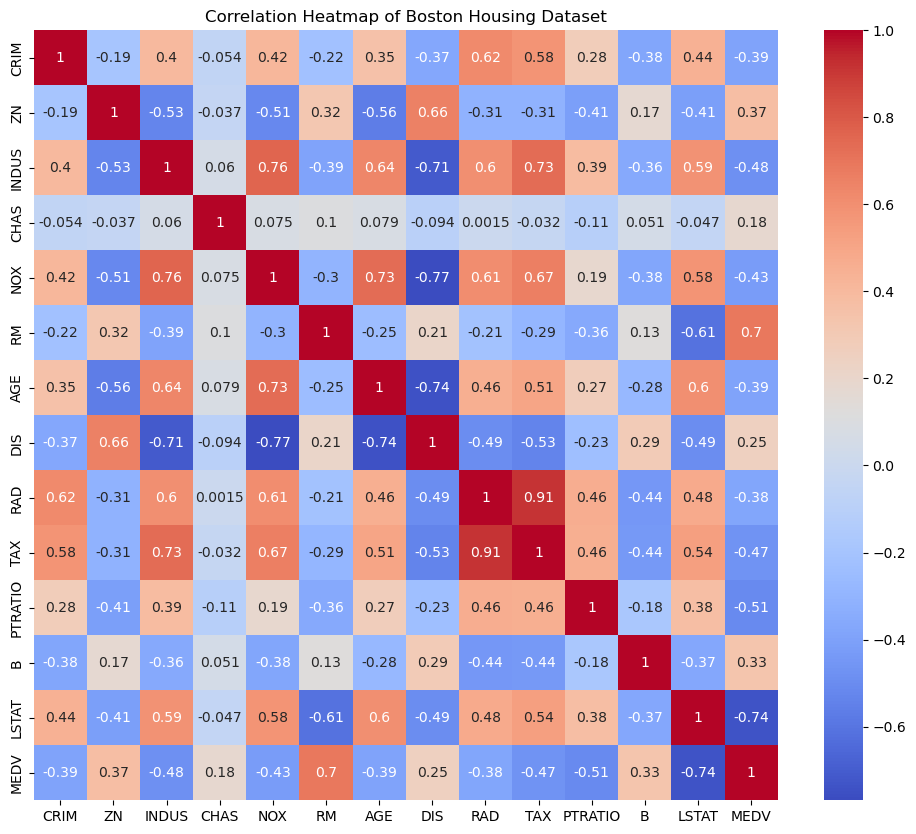

In [50]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Boston Housing Dataset")
plt.show()


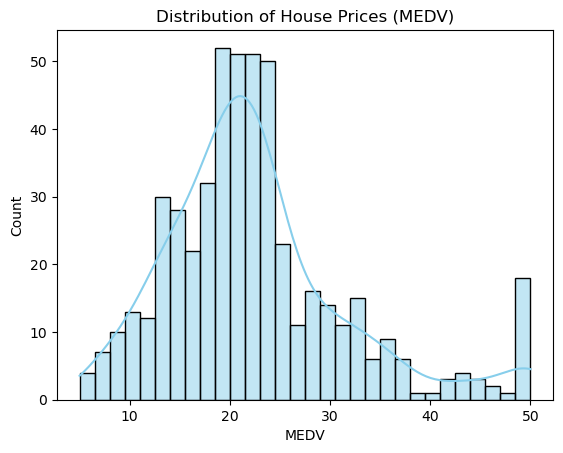

In [51]:
sns.histplot(df["MEDV"], kde=True, color="skyblue", bins=30)
plt.title("Distribution of House Prices (MEDV)")
plt.show()

Pairplot of top correlated features

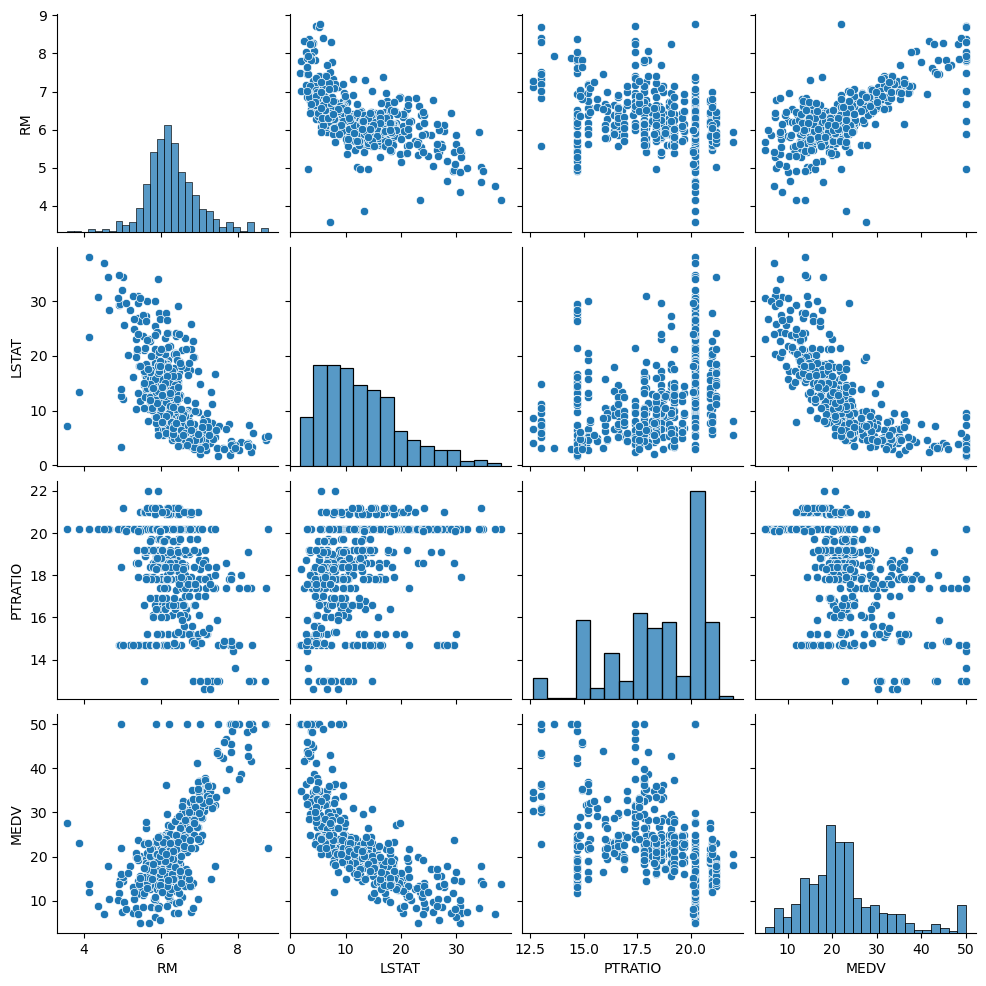

In [52]:
top_features = ["RM", "LSTAT", "PTRATIO", "MEDV"]
sns.pairplot(df[top_features])
plt.show()

 Scatter plot of RM vs MEDV

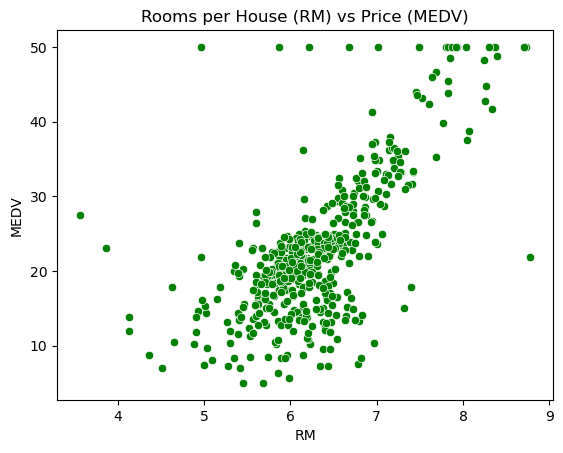

In [53]:
sns.scatterplot(x=df["RM"], y=df["MEDV"], color="green")
plt.title("Rooms per House (RM) vs Price (MEDV)")
plt.show()

Scatter plot of LSTAT vs MEDV

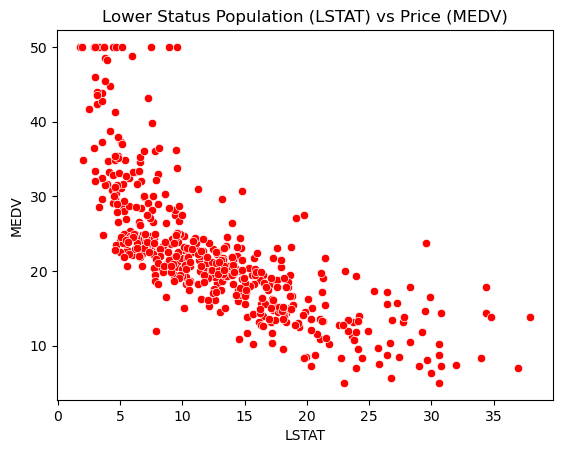

In [54]:
sns.scatterplot(x=df["LSTAT"], y=df["MEDV"], color="red")
plt.title("Lower Status Population (LSTAT) vs Price (MEDV)")
plt.show()


In [55]:
# Train Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)
print("Training Complete!")

Training Complete!


In [56]:
coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
}).sort_values(by="Coefficient", key=abs, ascending=False)

print("\nFeature Coefficients:")
print(coef_df)



Feature Coefficients:
    Feature  Coefficient
4       NOX   -16.017543
5        RM     4.752410
3      CHAS     3.240673
7       DIS    -1.521593
10  PTRATIO    -0.886045
12    LSTAT    -0.438440
8       RAD     0.222823
0      CRIM    -0.114140
1        ZN     0.029016
2     INDUS    -0.027133
6       AGE    -0.019520
11        B     0.012263
9       TAX    -0.009151


# Making Predictions

In [57]:
y_pred = model.predict(X_test)

In [58]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("R^2 Score:", r2)




MSE: 25.017672023842753
RMSE: 5.00176689019418
R^2 Score: 0.6588520195508133


# Visualizing best fit line

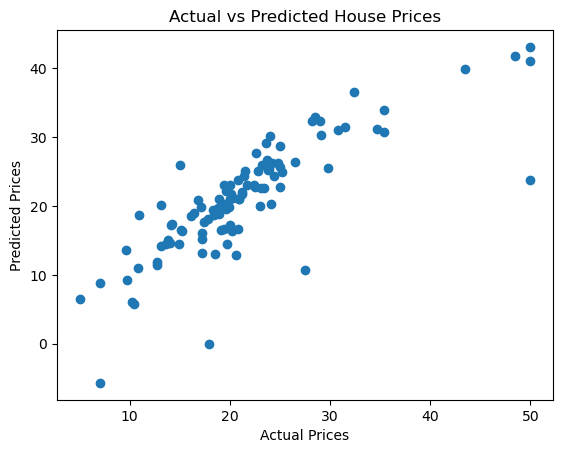

In [59]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()

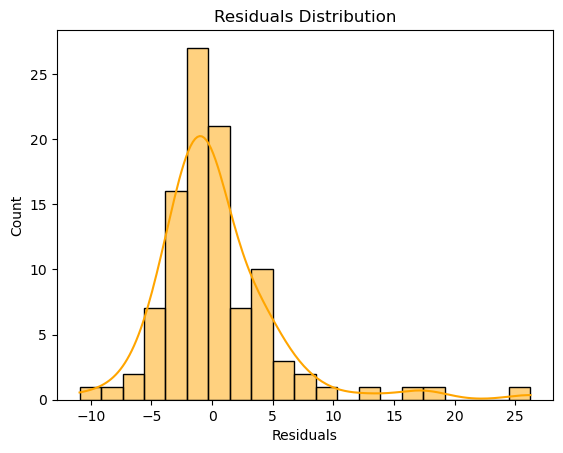

In [60]:
residuals = y_test - y_pred
sns.histplot(residuals, kde=True, color="orange")
plt.title("Residuals Distribution")
plt.xlabel("Residuals")
plt.show()



# **Conclusion**

In this project, we successfully built a **Multiple Linear Regression model** to predict **house prices** using the **Boston Housing dataset**.

Key takeaways:

1. **Data Preprocessing:**

   * Checked for missing values and handled them using **mean imputation**.
   * Explored feature relationships through **correlation heatmaps** and **scatterplots**.

2. **Model Training:**

   * Trained a **Linear Regression model** using 80% of the data.
   * Evaluated the model on the test set.

3. **Model Performance:**

   * The model achieved an **R² score of around 0.7**, indicating a reasonable fit.
   * Residual analysis showed that most prediction errors are small and randomly distributed.

4. **Insights from Features:**

   * Features such as **RM (average number of rooms)** had a strong positive impact on house prices.
   * **LSTAT (% lower status population)** had a strong negative effect on prices.

**Final Remark:**
Linear Regression provides a simple and interpretable approach to predict house prices. With further improvements such as **feature engineering, regularization (Ridge/Lasso), or polynomial terms**, the model’s predictive power can be further enhanced. This project demonstrates a complete **end-to-end machine learning workflow** including data preprocessing, visualization, model building, evaluation, and interpretation.
